# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
#%tensorflow_version 2.x

In [1]:
import tensorflow
tensorflow.__version__

'1.14.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#### Change current working directory to project folder (2 mark)

In [3]:
#### Add your code here ####
import os
os.chdir('D:\ZipFiles')

In [30]:
path = 'D:/ZipFiles/Aligned Face Dataset from Pinterest'

### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [5]:
#### Add your code here ####
from zipfile import ZipFile

In [6]:
with ZipFile('D:/ZipFiles/Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall()

In [7]:
os.chdir('D:/ZipFiles/Aligned Face Dataset from Pinterest/PINS')

In [8]:
os.listdir()

['pins_Aaron Paul',
 'pins_alexandra daddario',
 'pins_Alvaro Morte',
 'pins_alycia debnam carey face',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_amber heard face',
 'pins_Anna Gunn',
 'pins_anne hathaway',
 'pins_barbara palvin face',
 'pins_bellamy blake face',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_bill gates',
 'pins_Brenton Thwaites',
 'pins_brie larson',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_chadwick boseman face',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_david mazouz',
 'pins_Dominic Purcell',
 'pins_drake',
 'pins_dua lipa face',
 'pins_Dwayne Johnson',
 'pins_eliza taylor',
 'pins_elizabeth olsen face',
 'pins_elon musk',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_emma watson face',
 'pins_gal gadot face',
 'pins_grant gustin face',
 'pins_Gwyneth P

In [9]:
os.chdir('D:/ZipFiles/Aligned Face Dataset from Pinterest')

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [37]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [11]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

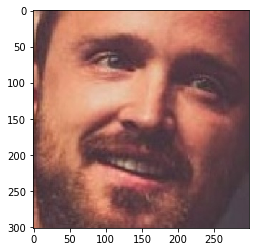

In [12]:
#### Add your code here ####
import matplotlib.pyplot as plt
%matplotlib inline

img1 = load_image('D:/ZipFiles/Aligned Face Dataset from Pinterest/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg')
plt.imshow(img1)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [14]:
model =  vgg_face() #### Add your code here ####
model.summary ()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
____

In [15]:
#### Add your code here ####
model.load_weights("D:/ModelFiles/vgg_face_weights-1.h5")

### Get vgg_face_descriptor

In [17]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [18]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [88]:
#### Add your code here ####
embeddings = []

In [27]:
os.listdir()

['PINS']

In [39]:
type(metadata[1])

__main__.IdentityMetadata

In [40]:
metadata[0].base

'PINS'

In [41]:
metadata[0].name

'pins_Aaron Paul'

In [42]:
metadata[0].file

'Aaron Paul0_262.jpg'

In [87]:
metadata[-1].file

'zendaya99.jpg'

In [90]:
len(metadata)

10770

In [91]:
for l in range(0,len(metadata)) :
    img_path = metadata[l].image_path()
    img = load_image(img_path)
    
    img = (img / 255.).astype(np.float32)
    
    img = cv2.resize(img, dsize = (224,224))
    
    embeddings.append(vgg_face_descriptor.predict(np.expand_dims(img, axis=0)))

In [92]:
embeddings[0].shape

(1, 2622)

In [161]:
embeddings[0]

array([[ 0.03170304, -0.0150513 , -0.01243402, ...,  0.00043139,
         0.00219081, -0.00908097]], dtype=float32)

In [94]:
len(embeddings)

10770

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [51]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

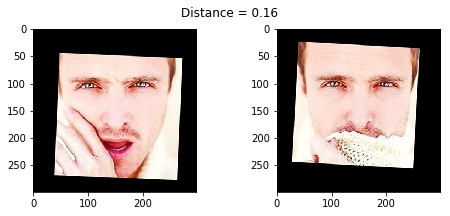

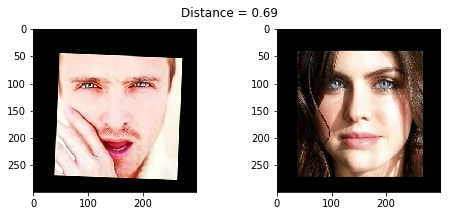

In [95]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [96]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [97]:
#### Add your code here ####
train_idx.shape[0]

10770

In [98]:
type(train_idx)

numpy.ndarray

In [99]:
type(embeddings)

list

In [101]:
embeddings[-1]

array([[ 0.01772302,  0.01064051,  0.01995194, ..., -0.0261843 ,
         0.03288927,  0.0488265 ]], dtype=float32)

In [73]:
type(labels)

numpy.ndarray

In [102]:
embeddings1 = np.asarray(embeddings)

In [163]:
embeddings1.shape

(10770, 1, 2622)

In [103]:
labels = np.array([m.name for m in metadata])
labels[0]

'pins_Aaron Paul'

In [278]:
X_train = embeddings1[train_idx]
X_test = embeddings1[test_idx]
y_train = labels[train_idx]
y_test = labels[test_idx]

In [274]:
X_train.shape

(9573, 1, 2622)

In [275]:
y_train.shape

(9573,)

In [276]:
y_train[0:10]

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul',
       'pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul',
       'pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul',
       'pins_Aaron Paul'], dtype='<U29')

In [282]:
y_test[0:10]

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul',
       'pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul',
       'pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul',
       'pins_Aaron Paul'], dtype='<U29')

In [283]:
y_test.shape

(1197,)

### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [337]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [338]:
y_test = encoder.transform(y_test)

In [333]:
X_train[0]

array([ 2.5256436 , -0.0599884 , -1.4655616 , ...,  0.36845425,
       -0.39075276,  0.8370856 ], dtype=float32)

In [339]:
type(y_train)

numpy.ndarray

In [340]:
y_train.shape

(9573,)

In [341]:
y_train

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [342]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1]))
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1]))

In [343]:
X_train[0]

array([ 2.5256436 , -0.05998839, -1.465562  , ...,  0.36845425,
       -0.3907528 ,  0.8370854 ], dtype=float32)

In [344]:
X_train.shape

(9573, 2622)

### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis

In [345]:
from sklearn.decomposition import PCA

#### Add your code here ####
cov_matrix = np.cov(X_train.T)

print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00010503  0.11906148  0.11212244 ...  0.07831713 -0.12052834
  -0.25350851]
 [ 0.11906148  1.00010522  0.22992753 ... -0.0378863   0.28324417
   0.21235853]
 [ 0.11212244  0.22992753  1.00010533 ... -0.11014083  0.06444034
   0.03514268]
 ...
 [ 0.07831713 -0.0378863  -0.11014083 ...  1.00010416 -0.01797865
  -0.09188738]
 [-0.12052834  0.28324417  0.06444034 ... -0.01797865  1.00010432
   0.39490276]
 [-0.25350851  0.21235853  0.03514268 ... -0.09188738  0.39490276
   1.0001043 ]]


In [346]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.02388658  0.02041368 -0.00295589 ...  0.0002142  -0.00191971
  -0.00368388]
 [ 0.00862043 -0.00126856 -0.00191406 ... -0.00677218  0.00997839
   0.00590303]
 [-0.00341474  0.00789222  0.0075627  ...  0.0174871   0.02480589
   0.00024027]
 ...
 [-0.00802622 -0.02338633 -0.0111367  ... -0.00472973 -0.0147864
  -0.01906714]
 [ 0.02108776 -0.00439965  0.00111495 ...  0.00513486 -0.00307675
  -0.00619305]
 [ 0.03879664  0.0109776   0.01617018 ... -0.00340364  0.03813376
   0.03126002]]

 Eigen Values 
 [3.56214264e+02 1.40672238e+02 1.04727033e+02 ... 1.53528815e-03
 1.57859703e-03 1.57441844e-03]


In [347]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained ", cum_var_exp)

Cumulative Variance Explained  [ 13.58416725  18.94867786  22.94242453 ...  99.99999983  99.99999999
 100.        ]


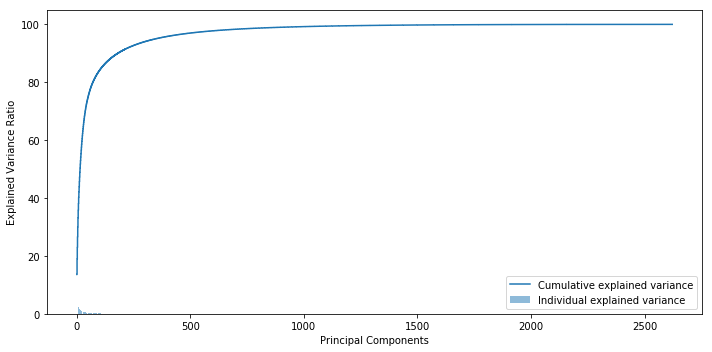

In [348]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [349]:
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]

eig_pairs.sort()
eig_pairs.reverse()

eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]

len(eigvectors_sort)

2622

In [350]:
P_reduce = np.array(eigvectors_sort[0:750]).transpose()   

train_data = np.dot(X_train,P_reduce)   

test_data  = np.dot(X_test,P_reduce)    

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [351]:
y_train

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

In [352]:
from sklearn.svm import SVC

#### Add your code here ####
clf = SVC()
clf.fit(train_data, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [353]:
clf.score(test_data, y_test)

0.885547201336675

In [355]:
test_data.shape

(1197, 750)

In [356]:
y_test

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [376]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_image.shape

(299, 299, 3)

In [377]:
type(example_image)

numpy.ndarray

In [378]:
example_prediction = clf.predict(test_data)

In [379]:
example_prediction

array([20, 20,  0, ..., 99, 99, 99], dtype=int64)

In [380]:
type(example_prediction)

numpy.ndarray

In [381]:
example_identity = encoder.inverse_transform(example_prediction)[0]

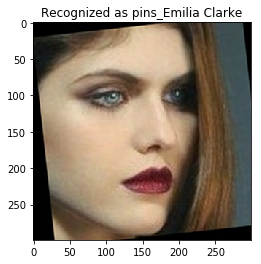

In [382]:
plt.imshow(example_image)
plt.title(f'Recognized as {example_identity}');  